In [205]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [207]:
# Import data
path = "/Users/Glebazzz/Jupiter/04.25 Instacart Basket Analysis" 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_merged_4-9.pkl'))
ords_prods_merge

product_id                product_name  aisle_id  department_id  \
0                1.0  Chocolate Sandwich Cookies      61.0           19.0   
1                1.0  Chocolate Sandwich Cookies      61.0           19.0   
2                1.0  Chocolate Sandwich Cookies      61.0           19.0   
3                1.0  Chocolate Sandwich Cookies      61.0           19.0   
4                1.0  Chocolate Sandwich Cookies      61.0           19.0   
...              ...                         ...       ...            ...   
28668044     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668045     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668046     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668047     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668048     49688.0      Fresh Foaming Cleanser      73.0           11.0   

          prices   order_id   user_id  order_number  orders_day_of_week  hour  \
0            5.8     5319.0  196224.0          65.0                 1.0  14.0   
1            5.8     7540.0  138499.0           8.0                 0.0  14.0   
2            5.8     9228.0   79603.0           2.0                 2.0  10.0   
3            5.8     9696.0  108919.0          46.0                 5.0  16.0   
4            5.8    11140.0   63782.0           4.0                 1.0  14.0   
...          ...        ...       ...           ...                 ...   ...   
28668044    13.5  3058519.0  145732.0           4.0                 0.0   8.0   
28668045    13.5  3106363.0  197371.0          10.0                 4.0  14.0   
28668046    13.5  3111954.0   79411.0           6.0                 4.0  19.0   
28668047    13.5  3122003.0  146323.0           3.0                 1.0  16.0   
28668048    13.5  3166828.0  188073.0           7.0                 1.0  15.0   

          ...  First Name  Second Name  Gender          State Age date_joined  \
0         ...       Roger        Casey    Male       New York  48   4/29/2018   
1         ...      Andrea      Summers  Female  Massachusetts  31   3/11/2017   
2         ...    Nicholas        Logan    Male      Tennessee  65  10/27/2019   
3         ...         Bob    Robertson    Male  Massachusetts  34  12/12/2018   
4         ...        Adam       Brewer    Male         Oregon  37  11/14/2017   
...       ...         ...          ...     ...            ...  ..         ...   
28668044  ...       Julie      Carroll  Female     New Jersey  78    4/1/2019   
28668045  ...   Stephanie       Correa  Female        Alabama  62  10/25/2019   
28668046  ...      Joseph     Cisneros    Male       Arkansas  50   7/13/2019   
28668047  ...       Wayne        Stone    Male       Arkansas  52   1/29/2017   
28668048  ...       Julie       Newton  Female      Minnesota  20   1/23/2018   

         houshold                        fam_status income USD  _merge  
0               2                           married      43906    both  
1               2                           married      78505    both  
2               1                           married      51010    both  
3               0                            single      93561    both  
4               1                           married      32646    both  
...           ...                               ...        ...     ...  
28668044        3                           married     157143    both  
28668045        1                           married     128072    both  
28668046        1                           married     149398    both  
28668047        3                           married     117424    both  
28668048        2  living with parents and siblings      27577    both  

[28668049 rows x 32 columns]

In [3]:
ords_prods_merge = ords_prods_merge.drop(columns = ['_merge'])

In [4]:
ords_prods_merge.shape

(28668049, 31)

In [5]:
ords_prods_merge.dtypes

product_id                float64
product_name               object
aisle_id                  float64
department_id             float64
prices                    float64
order_id                  float64
user_id                   float64
order_number              float64
orders_day_of_week        float64
hour                      float64
days_since_prior_order    float64
add_to_cart_order         float64
reordered                 float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                 float64
loyalty_flag               object
avg_value                 float64
spenders_flag              object
frequency                 float64
First Name                 object
Second Name                object
Gender                     object
State                      object
Age                         int64
date_joined                object
houshold                    int64
fam_status    

#### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
# Drop columns with direct PII
ords_prods_merge = ords_prods_merge.drop(columns=['First Name', 'Second Name'])

# Optional: Hash user_id if needed for unique tracking without exposure
import hashlib

def hash_user_id(x):
    return hashlib.sha256(str(x).encode()).hexdigest()

ords_prods_merge['user_id'] = ords_prods_merge['user_id'].apply(hash_user_id)

#### Create a regional segmentation of the data. 

In [9]:
# Define state-to-region mapping
state_to_region = {
    # Region 1: Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',

    # Region 2: Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',

    # Region 3: South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',

    # Region 4: West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

# Apply the mapping to create the Region column
ords_prods_merge['Region'] = ords_prods_merge['State'].map(state_to_region)

# Verify the Allocation of the 'Region' column in the Dataframe
ords_prods_merge.head(10)

product_id                product_name  aisle_id  department_id  prices  \
0         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
1         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
2         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
3         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
4         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
5         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
6         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
7         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
8         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   
9         1.0  Chocolate Sandwich Cookies      61.0           19.0     5.8   

   order_id                                            user_id  order_number  \
0    5319.0  e79d448e570ba907c0214207be5c439a1c07b6b52edb13...          65.0   
1    7540.0  379b4a26f89369b9c5aefe5d22c362ce7df2e19e9f0700...           8.0   
2    9228.0  a11ed7cd83dab29e198f5a0efbe9e7c2d871d95ec7cd5b...           2.0   
3    9696.0  179ee76211c2b695cff0e59a538a32b3178528d89d1e60...          46.0   
4   11140.0  e6e875f6edff3feb91dddfd86bfbb2cf14d3cebaf890f3...           4.0   
5   11485.0  72172e9cf172d3fb5eb8ee7a8c410a828eb97f3fbd6c8a...           5.0   
6   12672.0  1cc29312aed52a55a4c067b76438eaf6f75e99b81511e5...          28.0   
7   13668.0  0f2656e3ef6fb384b565f8dc61e737c7c84a745a122f77...          10.0   
8   14668.0  8226876ca2740b1d81c8a76c59b22829e52beb893644cd...          18.0   
9   16132.0  9769917c729c6576a4b13ce17ba3c65090a5f05edcfceb...          64.0   

   orders_day_of_week  hour  ...  spenders_flag  frequency  Gender  \
0                 1.0  14.0  ...    Low spender   1.461712    Male   
1                 0.0  14.0  ...    Low spender   9.313609  Female   
2                 2.0  10.0  ...    Low spender  28.869565    Male   
3                 5.0  16.0  ...    Low spender   6.958838    Male   
4                 1.0  14.0  ...    Low spender  20.200000    Male   
5                 5.0  18.0  ...    Low spender  17.921875    Male   
6                 5.0  10.0  ...    Low spender   3.492188  Female   
7                 4.0  17.0  ...    Low spender  14.990196    Male   
8                 0.0  22.0  ...    Low spender   8.582645  Female   
9                 2.0  10.0  ...    Low spender   4.391003    Male   

                  State Age date_joined houshold  \
0              New York  48   4/29/2018        2   
1         Massachusetts  31   3/11/2017        2   
2             Tennessee  65  10/27/2019        1   
3         Massachusetts  34  12/12/2018        0   
4                Oregon  37  11/14/2017        1   
5  District of Columbia  80   4/12/2017        1   
6  District of Columbia  19  10/14/2017        2   
7            New Mexico  79   3/29/2017        2   
8              Oklahoma  43    1/3/2020        1   
9                Alaska  18   5/17/2019        0   

                         fam_status income USD     Region  
0                           married      43906  Northeast  
1                           married      78505  Northeast  
2                           married      51010      South  
3                            single      93561  Northeast  
4                           married      32646       West  
5                           married      47464      South  
6  living with parents and siblings      93441      South  
7                           married     139395       West  
8                           married      32423      South  
9                            single      64009       West  

[10 rows x 30 columns]

In [10]:
#Performing value counts to make sure the script was correctly performed 
ords_prods_merge['Region'].value_counts(dropna=False)

Region
South        9545160
West         7333294
Midwest      6714203
Northeast    5075392
Name: count, dtype: int64

In [11]:
# Comparing it to total counts of the dataset 28668049 to value counts

#Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
#Using crosstab to identify spending patterns

crosstab = pd.crosstab(ords_prods_merge['Region'], ords_prods_merge['spenders_flag'], dropna = False)
crosstab.to_clipboard()

Region	High spender	Low spender
Midwest	140689	6573514
Northeast	95217	4980175
South	184381	9360779
West	138734	7194560


In [13]:
ords_prods_merge.groupby('Region').value_counts({'spenders_flag'})

Region     spenders_flag
Midwest    Low spender      6573514
           High spender      140689
Northeast  Low spender      4980175
           High spender       95217
South      Low spender      9360779
           High spender      184381
West       Low spender      7194560
           High spender      138734
Name: count, dtype: int64

/var/folders/fc/s6516jc11cj94_khwgp9nvn00000gq/T/ipykernel_65209/1306048225.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])


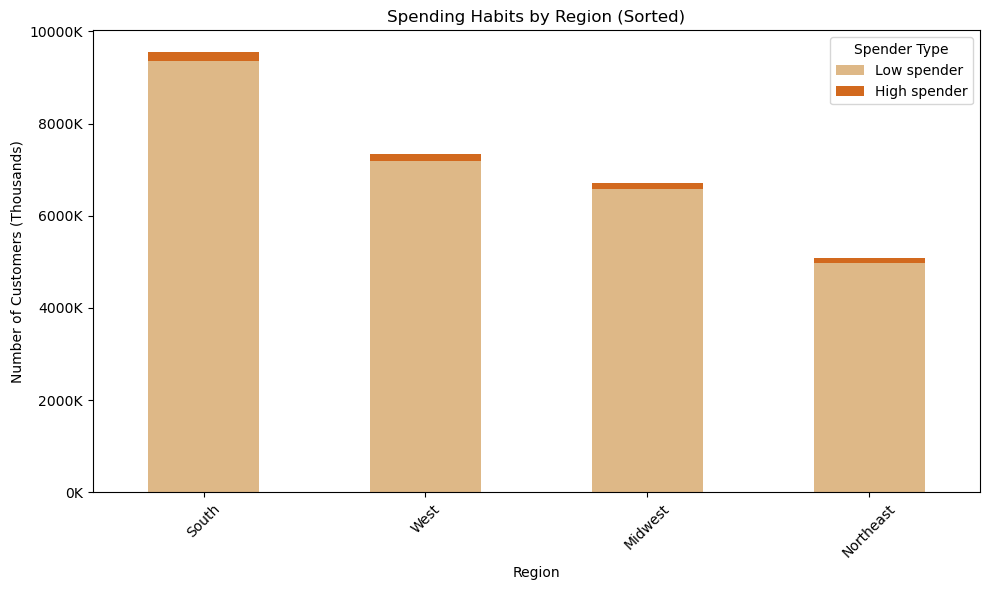

In [14]:
# Group and count combinations
region_spenders = ords_prods_merge.groupby(['Region', 'spenders_flag']).size().unstack(fill_value=0)

# Reorder spender columns so 'High spender' is on top
region_spenders = region_spenders[['Low spender', 'High spender']]

# Sort bars by total spenders
region_spenders['Total'] = region_spenders.sum(axis=1)
region_spenders = region_spenders.sort_values('Total', ascending=False)
region_spenders = region_spenders.drop(columns='Total')

# Plot
ax = region_spenders.plot(kind='bar', stacked=True,
                          color=['burlywood', 'chocolate'],
                          figsize=(10, 6))

# Format y-axis in thousands
ax.set_yticklabels([f'{int(x/1000)}K' for x in ax.get_yticks()])

plt.title('Spending Habits by Region (Sorted)')
plt.xlabel('Region')
plt.ylabel('Number of Customers (Thousands)')
plt.xticks(rotation=45)
plt.legend(title='Spender Type', loc='upper right')
plt.tight_layout()
plt.show()

In [15]:
# save chart
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_spenders.png'))

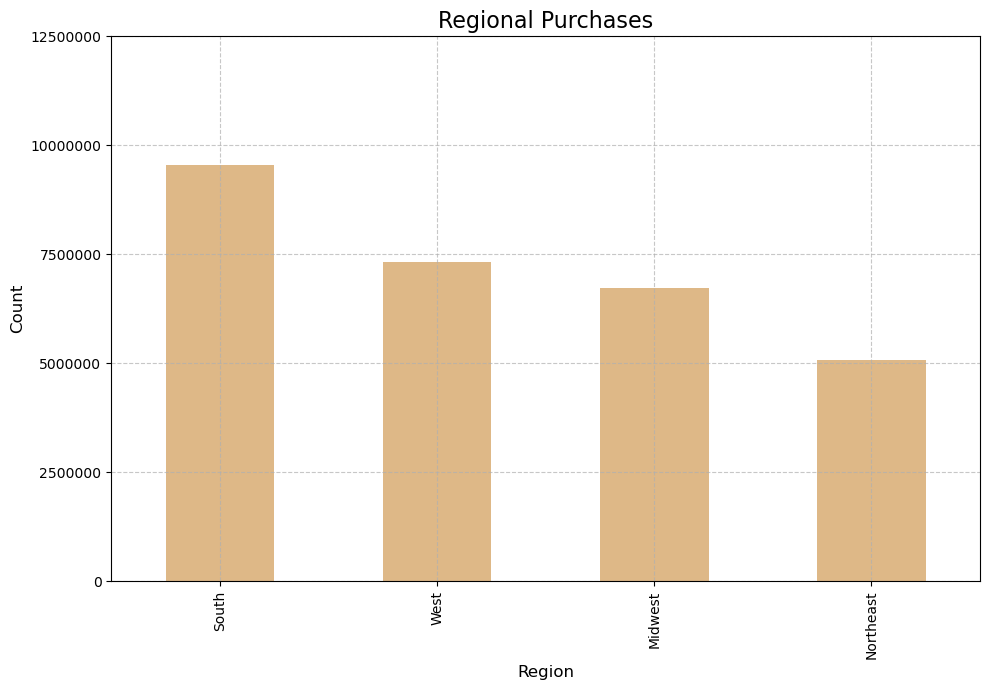

In [16]:
# Plotting the crosstab data
bar_regional_counts = ords_prods_merge['Region'].value_counts().plot(kind='bar', color='burlywood', figsize=(10, 7))

# Customizations
plt.title('Regional Purchases', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.yticks(np.arange(0,15000000,2500000), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

####The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# Create the exclusion flag 
ords_prods_merge['exclusion_flag'] = 'Include'
ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

# Filter the dataset
active_customers = ords_prods_merge[ords_prods_merge['exclusion_flag'] == 'Include']

# Export the filtered dataset
active_customers.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'active_customerss.csv'))

#### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [20]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'hour',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_value',
       'spenders_flag', 'frequency', 'Gender', 'State', 'Age', 'date_joined',
       'houshold', 'fam_status', 'income USD', 'Region', 'exclusion_flag'],
      dtype='object')

In [106]:
#create profiles based on Age and Income
def assign_profile(row):
    # Age categories
    if row['Age'] < 30:
        age_group = 'Young'
    elif 30 <= row['Age'] < 50:
        age_group = 'Adult'
    else:
        age_group = 'Senior'

    # Income levels
    if row['income USD'] < 50000:
        income_group = 'Low'
    elif 50000 <= row['income USD'] < 100000:
        income_group = 'Mid'
    else:
        income_group = 'High'

    # Combine into one profile string
    return f"{age_group} | {income_group} Income "

# Apply function to create a new column
ords_prods_merge['profile'] = ords_prods_merge.apply(assign_profile, axis=1)


In [108]:
profiling = ords_prods_merge['profile'].value_counts(dropna = False)
profiling

profile
Senior | High Income     9952114
Adult | Mid Income       4899506
Young | Mid Income       4378394
Senior | Mid Income      3119680
Adult | High Income      3006184
Senior | Low Income      1216858
Adult | Low Income       1092098
Young | Low Income        831046
Young | High Income       172169
Name: count, dtype: int64

/var/folders/fc/s6516jc11cj94_khwgp9nvn00000gq/T/ipykernel_65209/2868241495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profiling_plot = sns.barplot(data=profile_counts, y='profile', x='count', palette='magma')


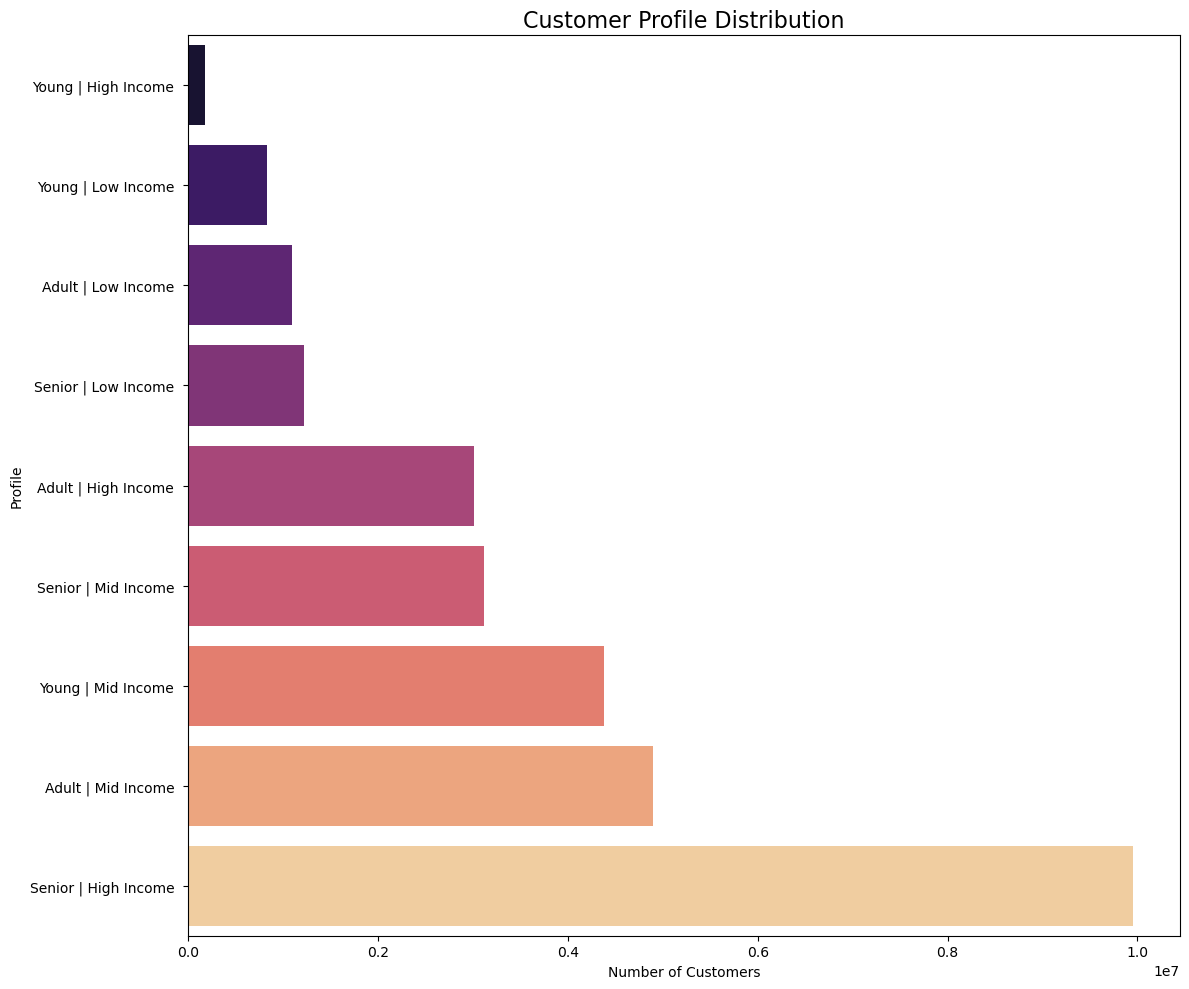

In [146]:
# Group by profile and count
profile_counts = ords_prods_merge.groupby('profile').size().reset_index(name='count')

# Sort for better visualization
profile_counts = profile_counts.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
profiling_plot = sns.barplot(data=profile_counts, y='profile', x='count', palette='magma')

plt.title('Customer Profile Distribution', fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('Profile')
plt.tight_layout()
plt.show()

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [114]:
# Performing Multiple Aggregations
ords_prods_merge.groupby('profile').agg({
    'frequency': ['mean', 'min', 'max'],
    'avg_value': ['mean', 'min', 'max']
})

frequency                   avg_value            \
                            mean       min   max        mean       min   
profile                                                                  
Adult | High Income    11.036190  0.000000  30.0   19.816034  7.000000   
Adult | Low Income     11.735019  0.000000  30.0    6.788014  1.000000   
Adult | Mid Income     11.035116  0.000000  30.0    8.306201  1.100000   
Senior | High Income   11.059685  0.000000  30.0   13.300010  7.000000   
Senior | Low Income    11.499202  0.100000  30.0    6.511910  1.000000   
Senior | Mid Income    11.146613  0.288204  30.0    8.583141  1.100000   
Young | High Income    10.902863  1.150000  30.0  130.104769  7.001282   
Young | Low Income     11.649538  0.304348  30.0    6.892871  1.000000   
Young | Mid Income     11.047008  0.250000  30.0    8.529201  6.998039   

                                     
                                max  
profile                              
Adult | High Income    25005.425000  
Adult | Low Income        12.411111  
Adult | Mid Income      7700.025641  
Senior | High Income   14042.512281  
Senior | Low Income        8.100000  
Senior | Mid Income     2550.966102  
Young | High Income    10209.987755  
Young | Low Income        13.878571  
Young | Mid Income      3402.921296

In [121]:
#create profiles based on certain goods in the “department_id” column, and the number of dependents
def assign_profile_dep(row):
    # Dependents
    if row['houshold'] == 0:
        family_status = 'Single'
    elif 1 <= row['houshold'] <= 2:
        family_status = 'Young Parent'
    else:
        family_status = 'Family'

    # Department type (product-based interest)
    dept_interest = {
        4: 'Produce Shopper',
        14: 'Snack Enthusiast',
        13: 'Meat Buyer',
        7: 'Dairy Lover',
        19: 'Beverage Fan'
    }.get(row['department_id'], 'General Shopper')

    # Combine into one profile string
    return f"{family_status} | {dept_interest} interest "

# Apply function to create a new column
ords_prods_merge['profile2'] = ords_prods_merge.apply(assign_profile_dep, axis=1)

In [125]:
profiling2 = ords_prods_merge['profile2'].value_counts(dropna = False)
profiling2

profile2
Young Parent | General Shopper interest      6518778
Young Parent | Produce Shopper interest      4190571
Family | General Shopper interest            3274803
Single | General Shopper interest            3252133
Family | Produce Shopper interest            2116327
Single | Produce Shopper interest            2104323
Young Parent | Beverage Fan interest         1279356
Young Parent | Dairy Lover interest          1191029
Young Parent | Meat Buyer interest            826709
Single | Beverage Fan interest                641149
Family | Beverage Fan interest                638907
Single | Dairy Lover interest                 598216
Family | Dairy Lover interest                 592725
Family | Meat Buyer interest                  412949
Single | Meat Buyer interest                  410138
Young Parent | Snack Enthusiast interest      311902
Single | Snack Enthusiast interest            154431
Family | Snack Enthusiast interest            153603
Name: count, dtype: int64

/var/folders/fc/s6516jc11cj94_khwgp9nvn00000gq/T/ipykernel_65209/3692347714.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profiling_plot_2 = sns.barplot(data=profile_counts2, y='profile2', x='count', palette='magma')


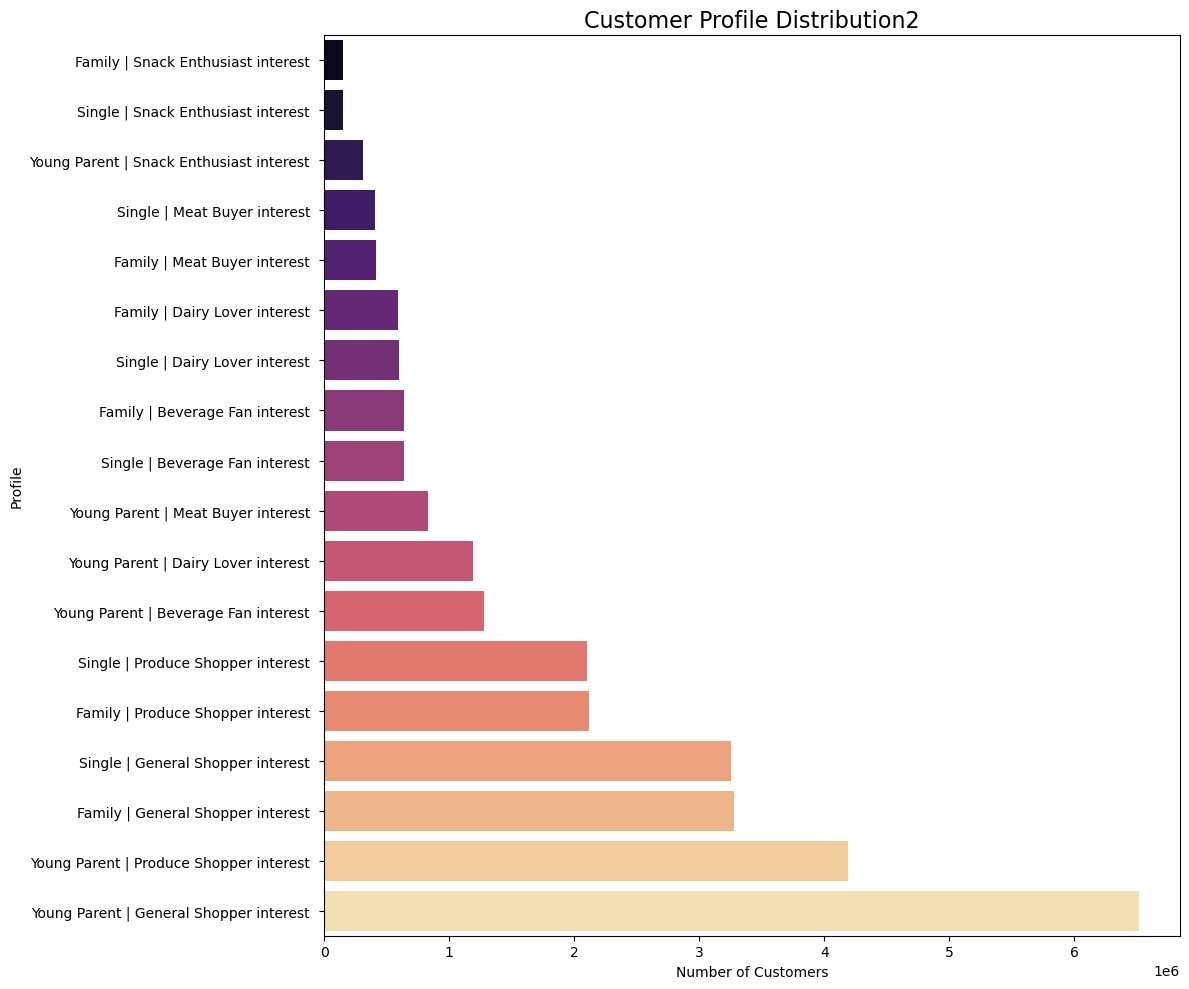

In [148]:
# Group by profile and count
profile_counts2 = ords_prods_merge.groupby('profile2').size().reset_index(name='count')

# Sort for better visualization
profile_counts2 = profile_counts2.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
profiling_plot_2 = sns.barplot(data=profile_counts2, y='profile2', x='count', palette='magma')

plt.title('Customer Profile Distribution2', fontsize=16)
plt.xlabel('Number of Customers')
plt.ylabel('Profile')
plt.tight_layout()
plt.show()

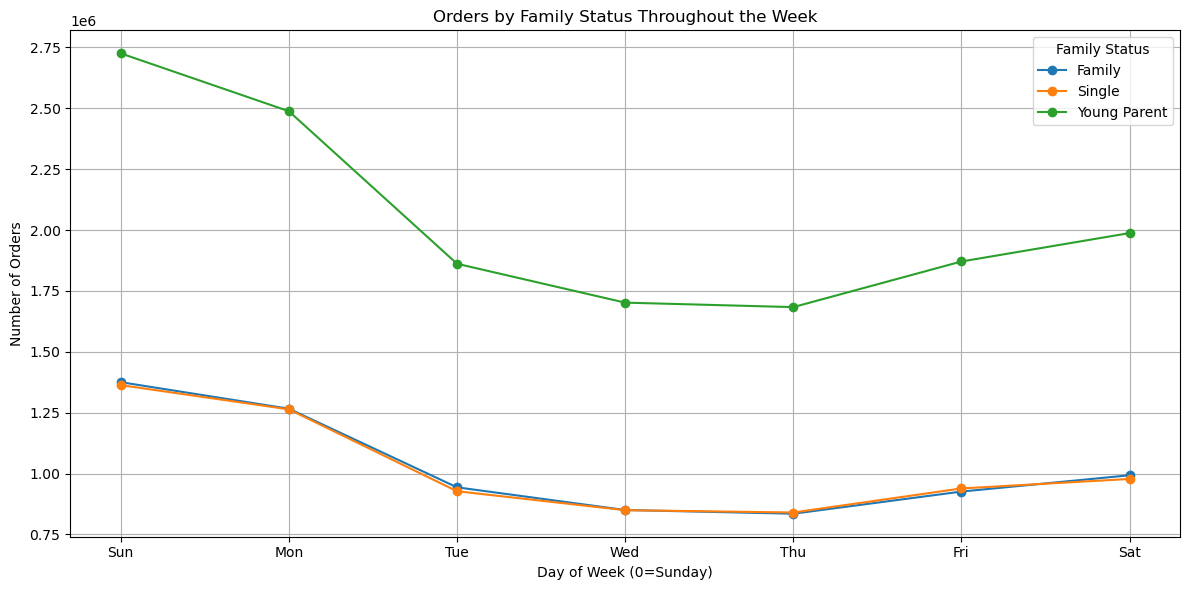

In [192]:
# Extract 'family_status' using str.split
ords_prods_merge['family_status'] = ords_prods_merge['profile2'].str.split(' \\| ').str[0]
# Group data by day of the week and family status, count orders
weekly_profile = ords_prods_merge.groupby(['orders_day_of_week', 'family_status']).size().reset_index(name='order_count')

# Pivot data for plotting
weekly_pivot = weekly_profile.pivot(index='orders_day_of_week', columns='family_status', values='order_count')

# Plot line chart
Weekly_linechart = weekly_pivot.plot(kind='line', figsize=(12, 6), marker='o')

# Customize plot
plt.title('Orders by Family Status Throughout the Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.legend(title='Family Status')
plt.grid(True)
plt.tight_layout()

plt.show()

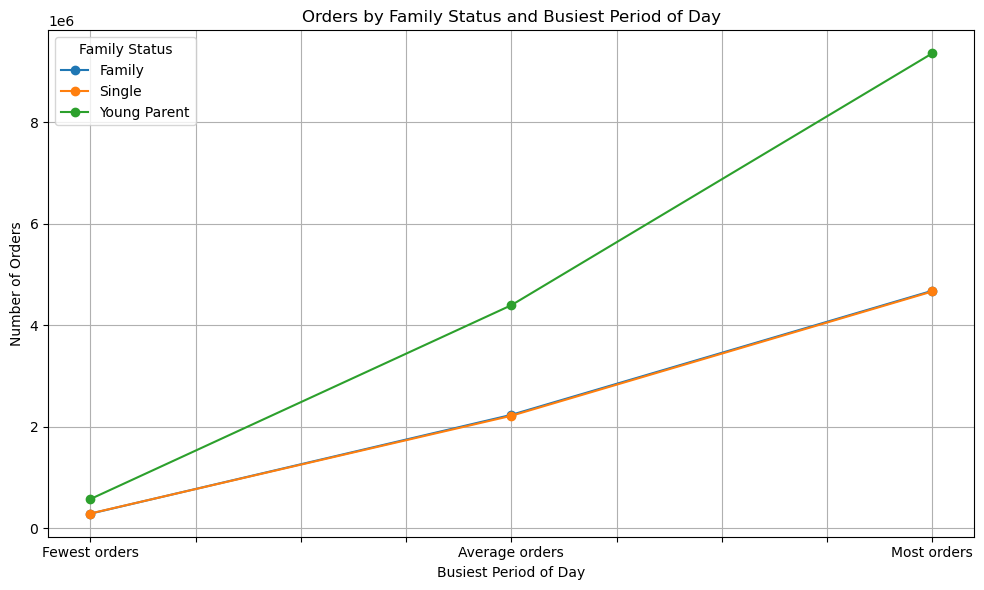

In [191]:
# Group by busiest_period_of_day and family_status, count the number of orders
period_profile = ords_prods_merge.groupby(['busiest_period_of_day', 'family_status']).size().reset_index(name='order_count')

# Pivot for plotting
period_pivot = period_profile.pivot(index='busiest_period_of_day', columns='family_status', values='order_count')

# Ensure correct order for x-axis
order = ['Fewest orders', 'Average orders', 'Most orders']
period_pivot = period_pivot.reindex(order)

# Plot the line chart
period_of_the_day_linechart = period_pivot.plot(kind='line', marker='o', figsize=(10, 6))

# Customize plot
plt.title('Orders by Family Status and Busiest Period of Day')
plt.xlabel('Busiest Period of Day')
plt.ylabel('Number of Orders')
plt.legend(title='Family Status')
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [116]:
# Count of profiles by region
profile_region = ords_prods_merge.groupby(['Region', 'profile']).size().reset_index(name='count')

# Optional: pivot for easier comparison
pivot_region = profile_region.pivot(index='Region', columns='profile', values='count').fillna(0)

display(pivot_region)

profile    Adult | High Income   Adult | Low Income   Adult | Mid Income   \
Region                                                                      
Midwest                  737222               265235              1119493   
Northeast                530088               192657               853515   
South                    974249               369929              1671638   
West                     764625               264277              1254860   

profile    Senior | High Income   Senior | Low Income   Senior | Mid Income   \
Region                                                                         
Midwest                  2363451                271631                704112   
Northeast                1787112                216642                544646   
South                    3267859                414137               1037524   
West                     2533692                314448                833398   

profile    Young | High Income   Young | Low Income   Young | Mid Income   
Region                                                                     
Midwest                   45199               198030              1009830  
Northeast                 23010               140592               787130  
South                     60495               282024              1467305  
West                      43465               210400              1114129

In [131]:
# Count of profiles by region
profile_region2 = ords_prods_merge.groupby(['Region', 'profile2']).size().reset_index(name='count')

# Optional: pivot for easier comparison
pivot_region2 = profile_region2.pivot(index='Region', columns='profile2', values='count').fillna(0)

display(pivot_region2)

profile2   Family | Beverage Fan interest   Family | Dairy Lover interest   \
Region                                                                       
Midwest                             142925                          133702   
Northeast                           115898                          105732   
South                               211311                          200417   
West                                168773                          152874   

profile2   Family | General Shopper interest   Family | Meat Buyer interest   \
Region                                                                         
Midwest                                751751                          96998   
Northeast                              580117                          72720   
South                                 1093637                         136800   
West                                   849298                         106431   

profile2   Family | Produce Shopper interest   \
Region                                          
Midwest                                486441   
Northeast                              376245   
South                                  699904   
West                                   553737   

profile2   Family | Snack Enthusiast interest   \
Region                                           
Midwest                                  35027   
Northeast                                26194   
South                                    51427   
West                                     40955   

profile2   Single | Beverage Fan interest   Single | Dairy Lover interest   \
Region                                                                       
Midwest                             150653                          138424   
Northeast                           112050                          106696   
South                               215782                          201115   
West                                162664                          151981   

profile2   Single | General Shopper interest   Single | Meat Buyer interest   \
Region                                                                         
Midwest                                769522                          97137   
Northeast                              570469                          71803   
South                                 1079218                         135004   
West                                   832924                         106194   

profile2   Single | Produce Shopper interest   \
Region                                          
Midwest                                496935   
Northeast                              365051   
South                                  699344   
West                                   542993   

profile2   Single | Snack Enthusiast interest   \
Region                                           
Midwest                                  36854   
Northeast                                27325   
South                                    50803   
West                                     39449   

profile2   Young Parent | Beverage Fan interest   \
Region                                             
Midwest                                   302554   
Northeast                                 229406   
South                                     420595   
West                                      326801   

profile2   Young Parent | Dairy Lover interest   \
Region                                            
Midwest                                  281316   
Northeast                                216626   
South                                    394197   
West                                     298890   

profile2   Young Parent | General Shopper interest   \
Region                                                
Midwest                                     1534087   
Northeast                                   1154383   
South                                       2170870   
West         

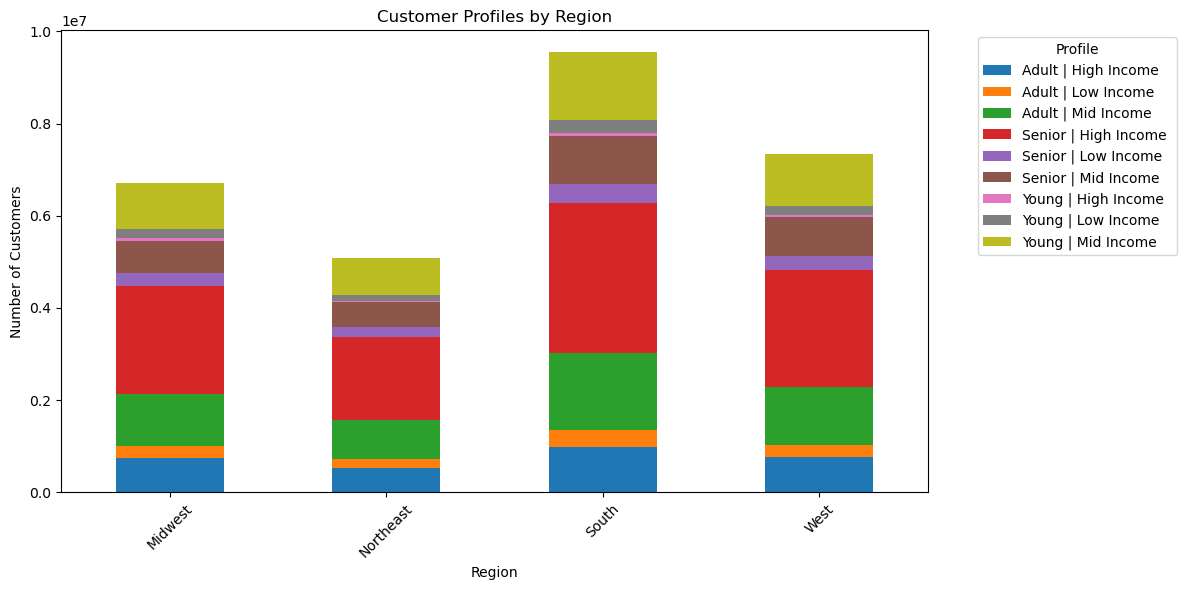

In [150]:
# Plot stacked bar chart
profile_by_region = pivot_region.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customizing the plot
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

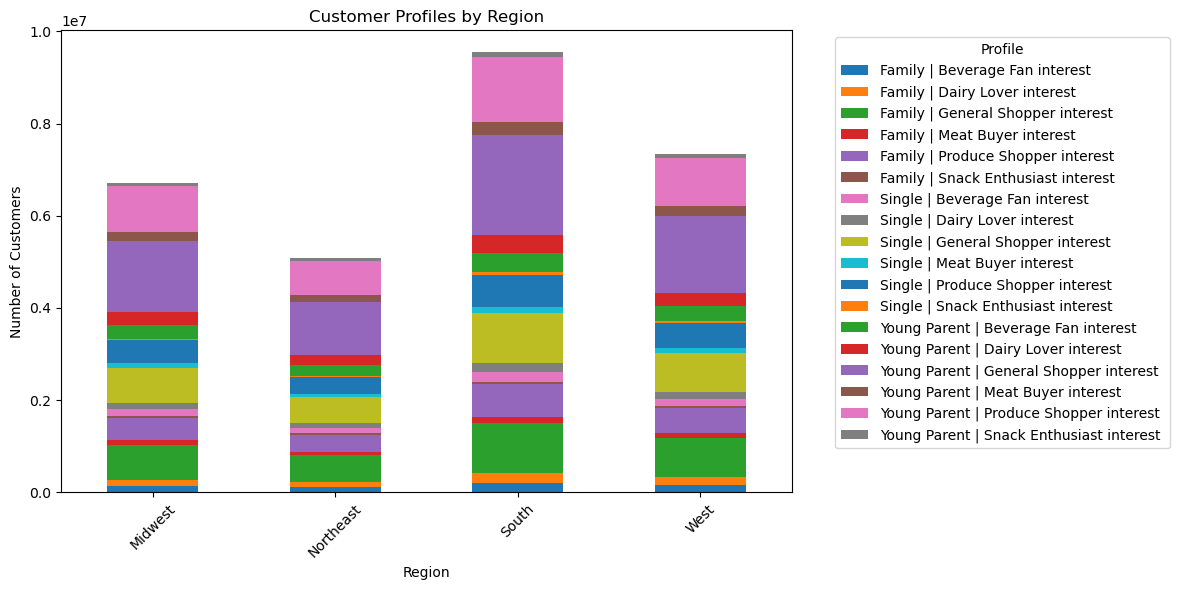

In [152]:
# Plot stacked bar chart
profile_by_region_2 =pivot_region2.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customizing the plot
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

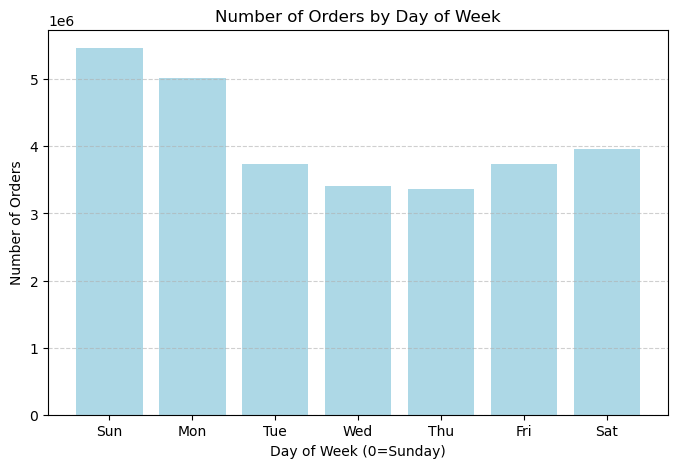

In [219]:
# Group and count orders by day of the week
busiest_days = ords_prods_merge.groupby('orders_day_of_week')['order_id'].count().reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(busiest_days['orders_day_of_week'], busiest_days['order_id'], color='lightblue')
plt.title('Number of Orders by Day of Week')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'days_of_week.png'))

plt.show()

In [217]:
def plot_orders_by_day_of_week(data_frame, save_path=None):
    """
    Creates a bar chart showing the number of orders by day of week.
    
    Args:
        data_frame (pd.DataFrame): DataFrame containing 'orders_day_of_week' and 'order_id' columns
        save_path (str, optional): Path to save the figure. If None, figure is not saved.
    
    Returns:
        matplotlib.figure.Figure: The created figure
    """
    # Group and count orders by day of the week
    busiest_days = data_frame.groupby('orders_day_of_week')['order_id'].count().reset_index()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(busiest_days['orders_day_of_week'], busiest_days['order_id'], color='lightblue')
    
    # Add labels and formatting
    ax.set_title('Number of Orders by Day of Week')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Number of Orders')
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Example usage:
# save_path = os.path.join(path, '04 Analysis', 'Visualisations', 'days_of_week.png')
# plot_orders_by_day_of_week(ords_prods_merge, save_path)

In [195]:
bar_regional_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_regional_counts.png'))
profiling_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profiling_plot.png'))
profiling_plot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profiling_plot_2.png'))
profile_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profile_by_region.png'))
profile_by_region_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profile_by_region_2.png'))
period_of_the_day_linechart.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'period_of_the_day_linechart.png'))
Weekly_linechart.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Weekly_linechart.png'))

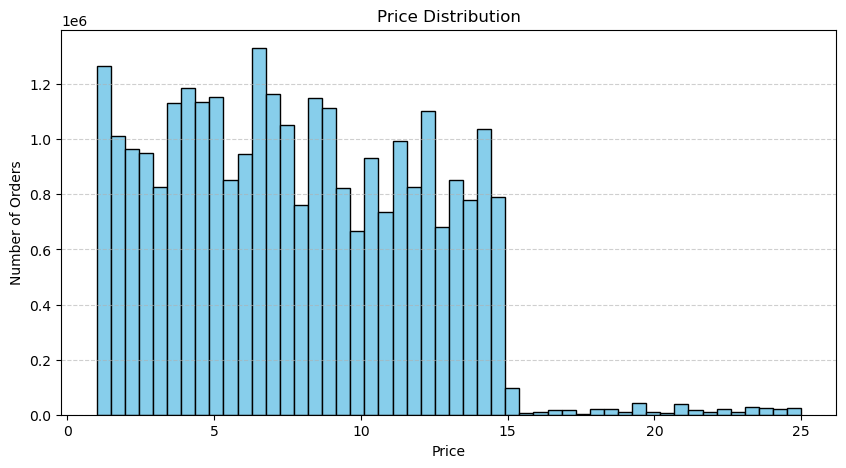

In [221]:
# Plot histogram of prices
plt.figure(figsize=(10,5))
ords_prods_merge['prices'].plot.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [223]:
# Check price distribution by quantiles
quantiles = ords_prods_merge['prices'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(quantiles)

0.10     2.3
0.25     4.2
0.50     7.4
0.75    11.3
0.90    13.6
0.95    14.3
0.99    18.2
Name: prices, dtype: float64


In [225]:
# Define bins using quantiles
bins = [0,
        ords_prods_merge['prices'].quantile(0.25),
        ords_prods_merge['prices'].quantile(0.75),
        ords_prods_merge['prices'].max()]
labels = ['Low', 'Mid', 'High']

ords_prods_merge['price_range'] = pd.cut(ords_prods_merge['prices'], bins=bins, labels=labels, include_lowest=True)

# Count by range
ords_prods_merge['price_range'].value_counts().sort_index()

price_range
Low      7197068
Mid     14480181
High     6986352
Name: count, dtype: int64

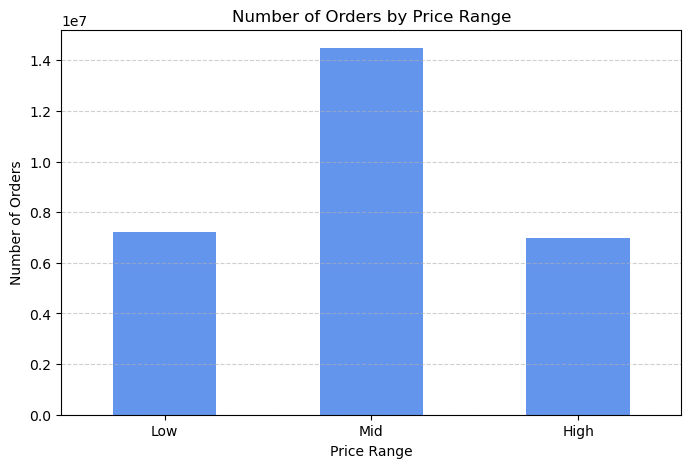

In [231]:
# Count number of orders in each range
price_range_counts = ords_prods_merge['price_range'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
price_range_countsplt = price_range_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Number of Orders by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.show()

In [235]:
price_range_countsplt.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'price_range_countsplt.png'))

AttributeError: 'Axes' object has no attribute 'to_pickle'

In [239]:
# Calculate 25th and 75th percentiles
low_cutoff = ords_prods_merge['prices'].quantile(0.25)
high_cutoff = ords_prods_merge['prices'].quantile(0.75)

# Print the actual values
print(f"Low < {low_cutoff:.2f}, Mid = {low_cutoff:.2f}–{high_cutoff:.2f}, High > {high_cutoff:.2f}")

Low < 4.20, Mid = 4.20–11.30, High > 11.30


In [241]:
ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'hour',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_value',
       'spenders_flag', 'frequency', 'First Name', 'Second Name', 'Gender',
       'State', 'Age', 'date_joined', 'houshold', 'fam_status', 'income USD',
       '_merge', 'price_range'],
      dtype='object')

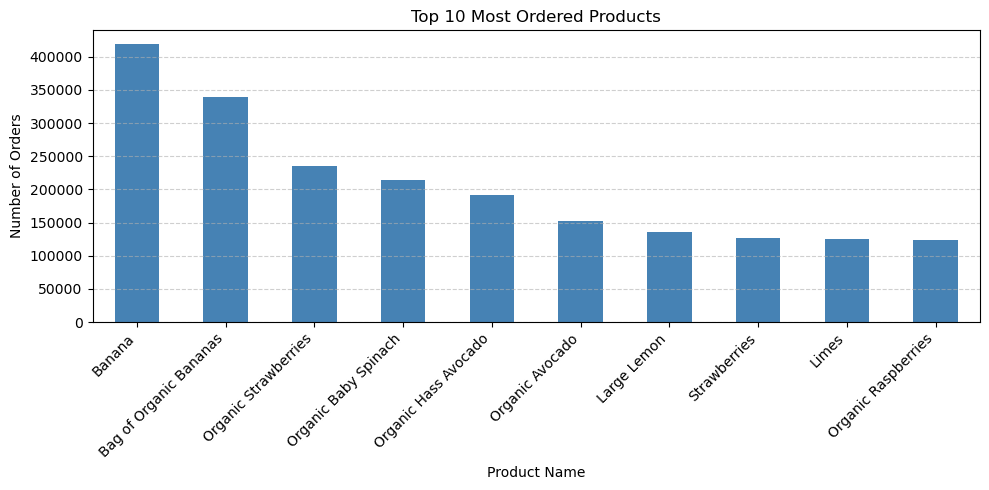

In [247]:
top_products = ords_prods_merge['product_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_products.png'))

plt.show()

In [ ]:
# Export the updated DataFrame
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_10.pkl'))

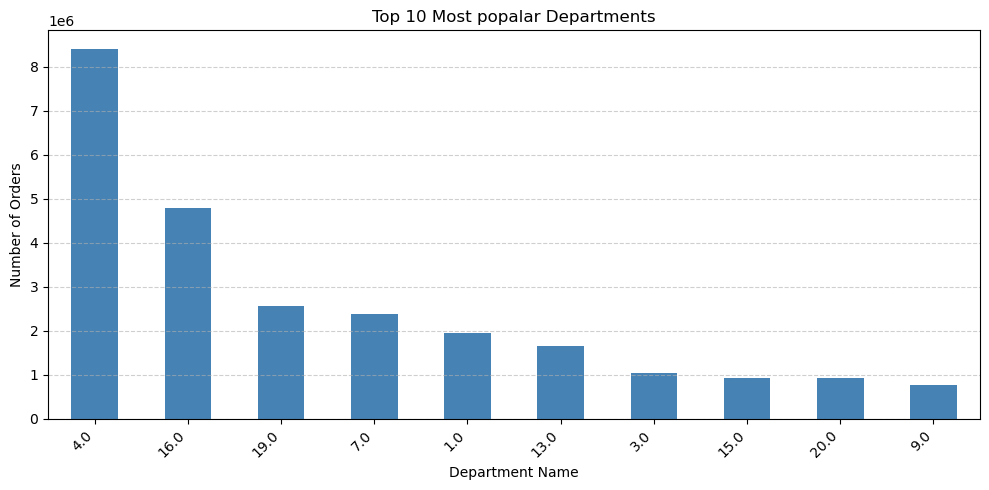

In [253]:

top_depts = ords_prods_merge['department_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_depts.plot(kind='bar', color='steelblue')
plt.title('Top 10 Most popalar Departments')
plt.xlabel('Department Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# save the figure
plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_depts.png'))

plt.show()

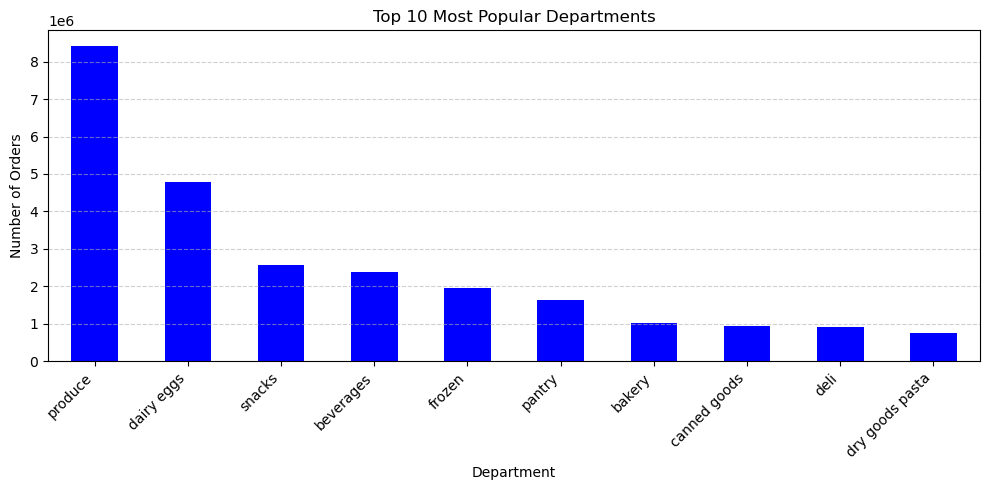

In [273]:
# Re-import and fix department file
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Departments.csv'), header=None)

# Transpose and reset columns
df_dep = df_dep.T
df_dep.columns = ['department_id', 'department']  # First row becomes header
df_dep = df_dep[1:]  # Drop the now-redundant header row
df_dep['department_id'] = df_dep['department_id'].astype(int)  # Convert to int

# Merge to get department names into main df
ords_prods_merge = ords_prods_merge.merge(df_dep, on='department_id', how='left')

top_depts = ords_prods_merge['department'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_depts.plot(kind='bar', color='blue')
plt.title('Top 10 Most Popular Departments')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_depts_named.png'))
plt.show()